In [94]:
#Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Read the csv file of data
df = pd.read_csv('Dataset.csv')

#Show the first five rows in the dataset
df.head()

,1) Gender,2) Age,3) Education Level,4) Major,5) administrative regions,"6) How often do you use the Internet and Internet-related services? (E.g. Email, WhatsApp, News, YouTube",7) What are your Internet/ Digital devices skills level?,"8) Of the following, which digital devices do you use regularly? Tick all that apply",9) What type of connectivity services do you use in your daily activities? Tick all that apply,10) For what purposes do you use the Internet? Tick all that apply,...,23) What do you think the role of the government should be in combating cyber crimes? Please tick all that apply.,"24) Have you been a victim of cyber crime? (E.g. lost data or email account, device infected with virus or spyware, stole your picture/s or digital device/s).","A. If Yes, When you had been a victim of cyber crime, did you report it?","If Yes, To whom did you report or contact? (Please check all that apply)","If No, What was/were the reason/s? (Please check all that apply)","B. If No, If you become a victim of cyber crime would you like to report it?","If Yes, To whom would you report or contact? (Please check all that apply)","If No, What is/are the reason/s? (Please check all that apply)",Unnamed: 64,Unnamed: 65
0,Female,18-29,"Postgraduate (Master’s, PhD)",Computer Science,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Desktop, Laptop, Smartphone",Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, C...",...,No role,Yes,No,NaN,I think that there is no value of reporting,"No, I would not",NaN,I do not know what the crime means,NaN,NaN
1,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,"Private Wi-Fi (e.g. in your home), Mobile/cell...","Social networks, Communication",...,Monitor organisations misusing consumer inform...,No,NaN,NaN,NaN,"Yes, I would","Saudi eGovernment Portal , Saudi CERT",NaN,NaN,NaN
2,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Tablet,Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, C...",...,Have stricter laws and punishments for cyber c...,Yes,Yes,Bank,NaN,"No, I would not",NaN,Not sure,NaN,NaN
3,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Laptop, Smartphone","Public Wi-Fi (e.g. in coffee shop), Private Wi...","Professional reasons, Education, Social networ...",...,Don’t know,No,NaN,NaN,NaN,"No, I would not",NaN,Not sure,NaN,NaN
4,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Desktop, Laptop, Smartphone","Private Wi-Fi (e.g. in your home), Mobile/cell...","Education, Social networks, Online services, E...",...,No role,Yes,No,NaN,I did not know how to describe or write report...,"No, I would not",NaN,I will fix the problem by myself,NaN,NaN


In [3]:
#Show the number of rows and columns in the dataset
df.shape

(1231, 66)

#### Change the name of columns

In [4]:
#Show the name of columns before change
col_names = df.columns


for i in col_names:
    print(i)


1)   Gender
2)    Age
3)    Education Level 
4)   Major
5)  administrative regions
6)  How often do you use the Internet and Internet-related services? (E.g. Email, WhatsApp, News, YouTube  
7) What are your Internet/ Digital devices skills level?
8)   Of the following, which digital devices do you use regularly? Tick all that apply
9)  What type of connectivity services do you use in your daily activities? Tick all that apply
10)  For what purposes do you use the Internet? Tick all that apply   
11)  - A- What operating systems do you use on your desktop/laptop? Tick all that apply.
 B- What operating systems do you use on your Smartphone/tablet? Tick all that apply
12) Some of the most commonly used security tools and applications for laptops, tablets, mobiles, etc. are given below. Select which of these you have used on your digital devices. Tick all that apply.
13) How secure do you feel your digital devices (e.g. computers and phones) are? 
14) Some security practices are describe

In [5]:
#Remove the space before and after the name of columns
df = df.rename(lambda x: x.strip(), axis='columns')

In [6]:
#Change the name of columns
df = df.rename(columns = {"1)   Gender": "Gender",
                          "2)    Age": "Age",
                          "3)    Education Level":"Education level",
                          "4)   Major":"Major",
                          "5)  administrative regions":"Administrative regions",
                          "6)  How often do you use the Internet and Internet-related services? (E.g. Email, WhatsApp, News, YouTube":"Number of use Internet and Internet-related services",
                          "7) What are your Internet/ Digital devices skills level?":"Internet/ Digital devices skills level",
                          "8)   Of the following, which digital devices do you use regularly? Tick all that apply":"Digital devices type",
                          "9)  What type of connectivity services do you use in your daily activities? Tick all that apply":"Type of connectivity",
                          "10)  For what purposes do you use the Internet? Tick all that apply":"Purpose of using internet",
                          "11)  - A- What operating systems do you use on your desktop/laptop? Tick all that apply.":"Operating system of desktop/laptop",
                          "B- What operating systems do you use on your Smartphone/tablet? Tick all that apply":"Operating system of smartphone/tablet",
                          "12) Some of the most commonly used security tools and applications for laptops, tablets, mobiles, etc. are given below. Select which of these you have used on your digital devices. Tick all that apply.":"Common security tools",
                          "13) How secure do you feel your digital devices (e.g. computers and phones) are?":"Secure of person's digital devices",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  [I check the legitimacy of a website before accessing it .]":"Legitimacy of a website",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  [I create a password that contains my personal information (e.g. last name, date of birth)]":"Password with personal information",
                          "14)Some security practices are described below. Please choose your common reaction for each practice:  [I am aware of the danger when clicking on banners, advertisements or pop-up screens that appear when surfing the Internet]":"Aware of the danger of clicking pop-up screens",
                          "14) Some security practices are described below. Please choose your common reaction for each practice :  [I give due attention to privacy settings on my social media account(s) (e.g. Facebook)]":"Attention to person's account privacy",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  [Social media services protect my personal information]":"Protection of social media services for personal info",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  I read the terms and conditions carefully before using any website":"Read terms and conditions of website",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  [I change the passwords of important accounts (such as online banking) frequently ]":"Change the important accounts passwords frequently",
                          "14Some security practices are described below. Please choose your common reaction for each practice:  [I feel safe when using public Wi-Fi]":"Using public Wi-Fi",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  [I feel my digital devices (computer, smartphones) has no value to hackers, they do not target me]":"No value for my digital devices to hackers",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  [I regularly install software updates ]":"Install software updates regularly",
                          "14) Some security practices are described below. Please choose your common reaction for each practice:  [I am careful about clicking on links in an email or social media post]":"Careful about clicking on links in an email or other post",
                          "15)  What digital devices do you have Internet security on (e.g. anti-virus)?":"Digital devices with Internet security tool",
                          "16)   If you use Internet security (e.g. anti-virus), is this kept up to date in terms of threat filters and signatures?":"Internet security tool up to date ",
                          "17) A. How do you keep yourself updated about cyber crime? Tick all that apply (offline Sources)":"Keep yourself updated about cybercrime (offline Sources)",
                          "B. How do you keep yourself updated about cyber crime? Tick all that apply (Online Sources)":"Keep yourself updated about cybercrime (Online Sources)",
                          "18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I think one should avoid disclosing personal information online]":"Avoid disclosing personal information online",
                          "18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I feel that the risk of becoming a victim of cyber crime has increased in the past year.]":"Risk of becoming a victim of cybercrime has increased",
                          "18) What is your opinion of each of the following statements? Select the appropriate response for each.:  [I am concerned that my online personal information is not secure enough ]":"Online personal information is not secure enough",
                          "18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I feel that I am well protected against cyber crime]":"Well protected against cybercrime",
                          "18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I am willing to accept increased Internet surveillance from the government if it can enhance Internet security ]":"Accept increased Internet surveillance from the government",
                          "18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I believe that the laws in effect are effective in managing the cyber crime problem]":"Laws are effective in managing the cybercrime problem",
                          "18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I feel informed about the threat of cyber crime]":"Informed about the threat of cybercrime",
                          "19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Received phishing emails (e.g. asking for money, personal information or bank account details)]":"Received phishing emails",
                          "19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Identity theft (somebody stealing your personal data and impersonating you, e.g. tweeting under your name)]":"Stealing your personal data",
                          "19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Malware (e.g. virus) infection of a device]":"Malware infection of a device",
                          "19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Being unable to access online services (e.g. banking services) because of cyber attacks]":"Being unable to access online services because of cyber attacks",
                          "19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Accidentally encountering material that promotes hatred or religious extremism]":"Encountering material promotes hatred or religious extremism",
                          "19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Online extortion (a demand for money to avert or stop extortion, or to avert scandal)]":"Online extortion",
                          "20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each   [I am concerned about identity theft (somebody stealing your personal data and impersonating you, e.g. tweeting under your name)]":"Concerned about identity theft",
                          "20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am not concerned about accidentally encountering child pornography online]":"Not concerned about encountering child pornography online",
                          "20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am concerned about receiving phishing emails (e.g. asking for money, personal information or bank account details]":"Concerned about receiving phishing emails",
                          "20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am concerned about not being able to access online services (e.g. banking services) because of cyber attacks]":"Concerned about not being able to access online services because of cyber attacks",
                          "20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am concerned about accidentally encountering material that promotes hatred or religious extremism]":"Concerned about encountering material promotes hatred or religious extremism",
                          "20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [Online extortion (a demand for money to avert or stop extortion, or to avert scandal)]":"Concerned about encountering online extortion",
                          "Other, please specify":"Delete 1",
                          "21)  What do you feel about the threat of cyber crimes in the future?":"Feeling about the threat of cybercrimes in the future",
                          "22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [The government]":"Responsibility of government in raising awareness of cybercrime",
                          "22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [The media]":"Responsibility of media in raising awareness of cybercrime",
                          "22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [Those offering online/Internet-based services (e.g. banks, online retailers, telecommunication companies, etc.)]":"Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime",
                          "22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [User itself]":"Responsibility of user itself in raising awareness of cybercrime",
                          "22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [Education system]":"Responsibility of education system in raising awareness of cybercrime",
                          "23)  What do you think the role of the government should be in combating cyber crimes? Please tick all that apply.":"Role of the government in combating cybercrimes",
                          "24)   Have you been a victim of cyber crime? (E.g. lost data or email account, device infected with virus or spyware, stole your picture/s or digital device/s).":"Victim of cybercrime",
                          "Other, please specify.1":"Delete 2",
                          "A. If Yes, When you had been a victim of cyber crime, did you report it?":"Report cybercrime",
                          "If Yes, To whom did you report or contact?  (Please check all that apply)":"To who report cybercrime",
                          "If No, What was/were the reason/s? (Please check all that apply)":"Reason of didn't report cybercrime",
                          "B. If No, If you become a victim of cyber crime would you like to report it?":"Not victim, report cybercrime",
                          "If Yes, To whom would you report or contact?  (Please check all that apply)":"Not victim, to who report cybercrime",
                          "If No, What is/are the reason/s? (Please check all that apply)":"Not victim, Reason of didn't report cybercrime"
                          })

In [7]:
#Remove the space before and after the names 
df = df.rename(lambda x: x.strip(), axis='columns')

In [8]:
#Show the name of columns after change
col_names = df.columns


for i in col_names:
    print(i)

Gender
Age
Education level
Major
Administrative regions
Number of use Internet and Internet-related services
Internet/ Digital devices skills level
Digital devices type
Type of connectivity
Purpose of using internet
Operating system of desktop/laptop
Operating system of smartphone/tablet
Common security tools
Secure of person's digital devices
Legitimacy of a website
Password with personal information
Aware of the danger of clicking pop-up screens
Attention to person's account privacy
Protection of social media services for personal info
Read terms and conditions of website
Change the important accounts passwords frequently
Using public Wi-Fi
No value for my digital devices to hackers
Install software updates regularly
Careful about clicking on links in an email or other post
Digital devices with Internet security tool
Internet security tool up to date
Keep yourself updated about cybercrime (offline Sources)
Keep yourself updated about cybercrime (Online Sources)
Avoid disclosing perso

#### Filling Missing Data

In [9]:
#Display all rows of the dataframe
pd.set_option("max_rows", None)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 66 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Gender                                                                                             1210 non-null   object 
 1   Age                                                                                                1212 non-null   object 
 2   Education level                                                                                    1200 non-null   object 
 3   Major                                                                                              1138 non-null   object 
 4   Administrative regions                                                                             1130 non-null   objec

In [11]:
#Finds rows with more than 10 nan values
df.loc[df.isnull().sum(1)>10].index

Int64Index([ 112,  250,  368,  398,  583,  607,  711,  866,  894,  930,  955,
            1024, 1091, 1141, 1142, 1145, 1202, 1230],
           dtype='int64')

In [12]:
#Show the rows with more than 10 nan values
df.loc[[ 112,  250,  368,  398,  583,  607,  711,  866,  894,  930,  955, 1024, 1091, 1141, 1142, 1145, 1202, 1230],:]

,Gender,Age,Education level,Major,Administrative regions,Number of use Internet and Internet-related services,Internet/ Digital devices skills level,Digital devices type,Type of connectivity,Purpose of using internet,...,Role of the government in combating cybercrimes,Victim of cybercrime,Report cybercrime,To who report cybercrime,Reason of didn't report cybercrime,"Not victim, report cybercrime","Not victim, to who report cybercrime","Not victim, Reason of didn't report cybercrime",Unnamed: 64,Unnamed: 65
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,NaN,Communication,...,NaN,Yes,No,NaN,"I did not trust the third party, I fixed the p...","No, I would not",NaN,I do not know who to write report about cyber ...,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communication,...,Work towards providing a global cyber security...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN,NaN,NaN
368,Female,18-29,High School,Islamic studies,NaN,NaN,NaN,NaN,Mobile/cellular phone network (e.g. 3G/4G),Social networks,...,Monitor organisations misusing consumer inform...,No,NaN,NaN,NaN,"No, I would not",NaN,I am not sure what the impact on me will be,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Laptop, Smartphone","Private Wi-Fi (e.g. in your home), Mobile/cell...","Social networks, Online services, Communication",...,Have stricter laws and punishments for cyber c...,Yes,No,NaN,I did not know how to describe or write report...,"No, I would not",NaN,I do not know what the crime means,NaN,NaN
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communication,...,Work towards providing a global cyber security...,No,NaN,NaN,NaN,"Yes, I would",Saudi eGovernment Portal,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,Frequently throughout the day,"Beginner/Basic (e.g. start computer and phone,...",Tablet,Private Wi-Fi (e.g. in your home),Social networks,...,Make people aware of cyber crime,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN,NaN,NaN
711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communication,...,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would","Saudi eGovernment Portal , Don’t know but will...",NaN,NaN,NaN
866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communication,...,Have stricter laws and punishments for cyber c...,Yes,No,NaN,I did not know how to describe or write report...,"No, I would not",NaN,I do not know what the crime means,NaN,NaN
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communication,...,Make people aware of cyber crime,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN,NaN,NaN
930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communication,...,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN,NaN,NaN


In [13]:
# Delete rows with more than 10 nan values  
df = df.drop([ 112,  250,  368,  398,  583,  607,  711,  866,  894,  930,  955, 1024, 1091, 1141, 1142, 1145, 1202, 1230])

df.shape

(1213, 66)

In [14]:
df.isnull().sum()

Gender                                                                                                  7
Age                                                                                                     4
Education level                                                                                        15
Major                                                                                                  76
Administrative regions                                                                                 84
Number of use Internet and Internet-related services                                                    1
Internet/ Digital devices skills level                                                                  8
Digital devices type                                                                                    2
Type of connectivity                                                                                    1
Purpose of using internet                     

In [15]:
# Remove leading and trailing space from values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#### Fill Missing Values by Mode

##### Fill Gender Columns

<AxesSubplot:title={'center':'Bar of Gender Column with NaN Values'}>

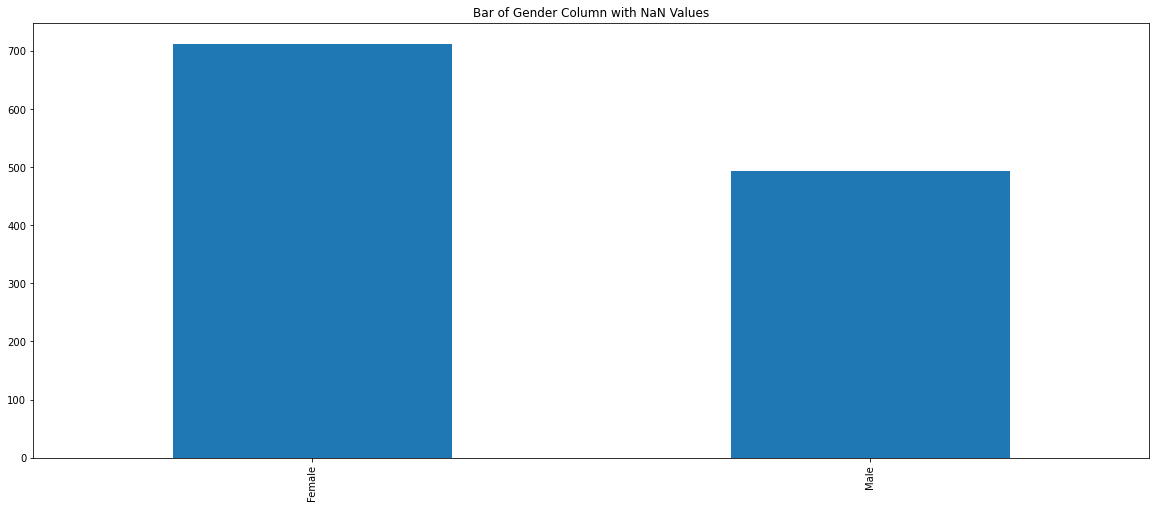

In [16]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Gender"].value_counts().plot(kind='bar',title="Bar of Gender Column with NaN Values")

In [17]:
# Calculate mode
gender_col_mode = df["Gender"].mode()[0]
gender_col_mode

'Female'

In [18]:
# Replace NaN values with mode
df["Gender"] = df["Gender"].replace(np.NaN, gender_col_mode)

<AxesSubplot:title={'center':'Bar of Gender Column without NaN Values'}>

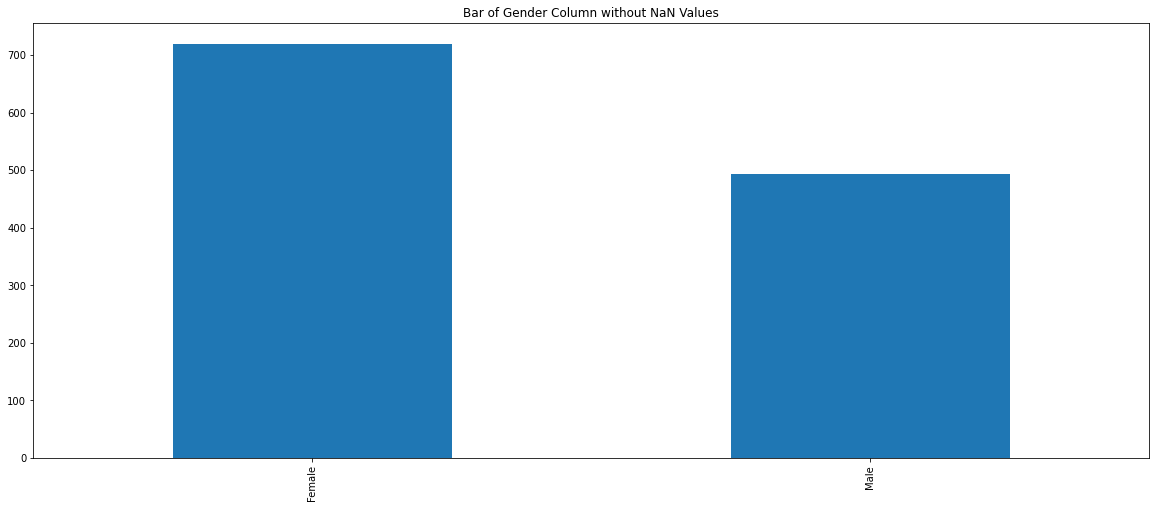

In [19]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Gender"].value_counts().plot(kind='bar',title="Bar of Gender Column without NaN Values")

##### Fill Education level Columns

In [20]:
df["Education level"].value_counts()

Undergraduate (Diploma, BSc)    851
Postgraduate (Master’s, PhD)    192
High School                     150
Middle School                     3
                                  2
Name: Education level, dtype: int64

In [21]:
# replace field that's entirely space (or empty) with NaN
df =df.replace(r'^\s*$', np.nan, regex=True)

In [22]:
df["Education level"].value_counts()

Undergraduate (Diploma, BSc)    851
Postgraduate (Master’s, PhD)    192
High School                     150
Middle School                     3
Name: Education level, dtype: int64

<AxesSubplot:title={'center':'Bar of Education level Column with NaN Values'}>

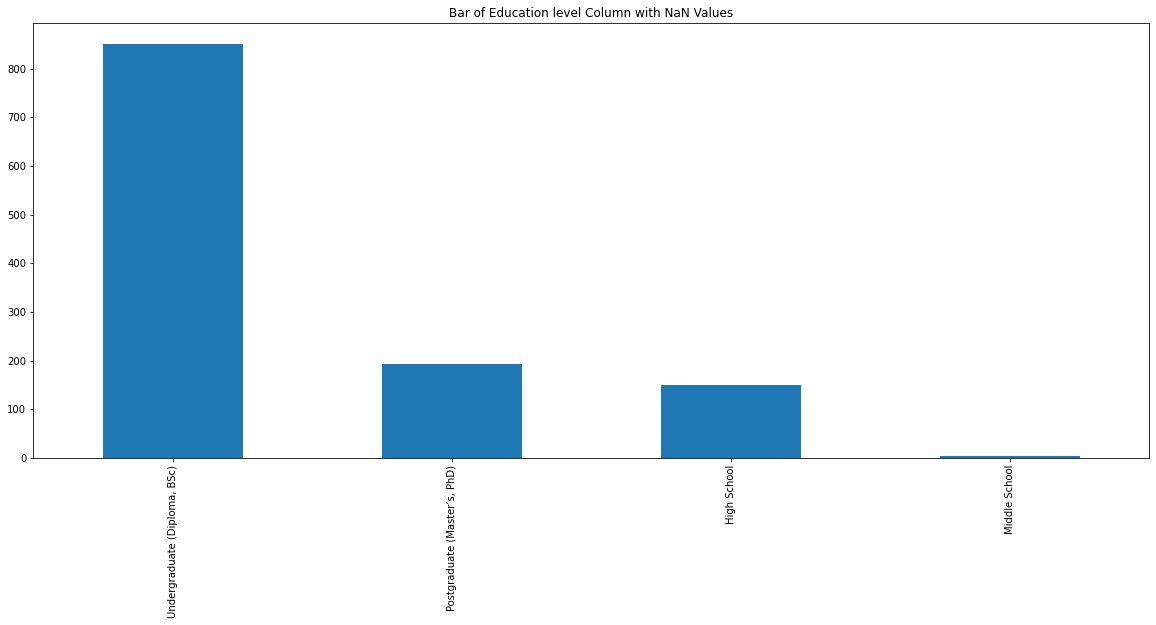

In [23]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Education level"].value_counts().plot(kind='bar',title="Bar of Education level Column with NaN Values")

In [24]:
# Calculate mode
eduction_col_mode = df["Education level"].mode()[0]
eduction_col_mode

'Undergraduate (Diploma, BSc)'

In [25]:
# Replace NaN values with mode
df["Education level"] = df["Education level"].replace(np.NaN, eduction_col_mode)

<AxesSubplot:title={'center':'Bar of Education level Column without NaN Values'}>

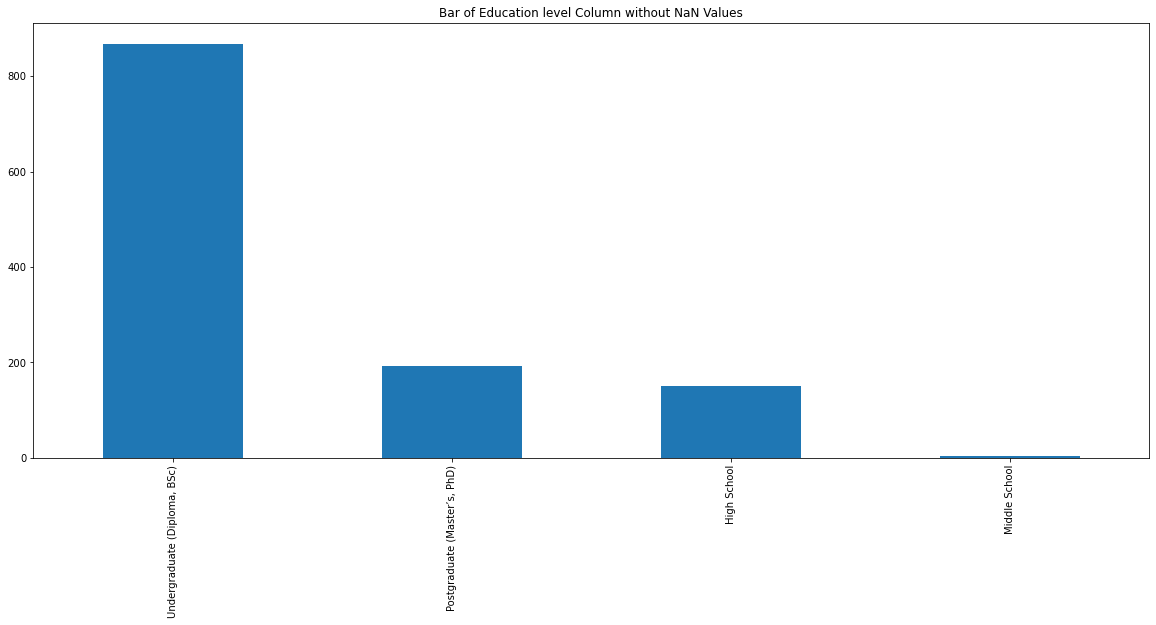

In [26]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Education level"].value_counts().plot(kind='bar',title="Bar of Education level Column without NaN Values")

##### Fill Number of use Internet and Internet-related services Columns

In [27]:
df["Number of use Internet and Internet-related services"].value_counts()

Frequently throughout the day                1092
Once or twice a day                           110
Less frequently (once a week, once month)      10
Name: Number of use Internet and Internet-related services, dtype: int64

<AxesSubplot:title={'center':'Bar of Number of use Internet and Internet-related services Column with NaN Values'}>

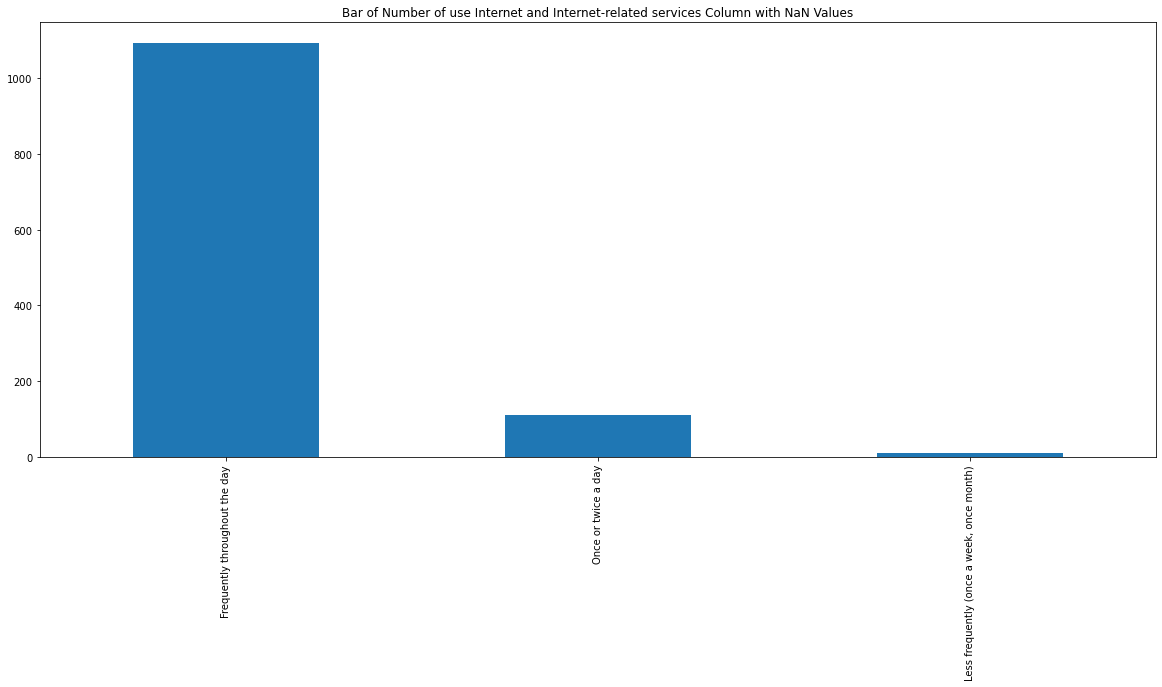

In [28]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Number of use Internet and Internet-related services"].value_counts().plot(kind='bar',title="Bar of Number of use Internet and Internet-related services Column with NaN Values")

In [29]:
# Calculate mode
InternetUsing_col_mode = df["Number of use Internet and Internet-related services"].mode()[0]
InternetUsing_col_mode

'Frequently throughout the day'

In [30]:
# Replace NaN values with mode
df["Number of use Internet and Internet-related services"] = df["Number of use Internet and Internet-related services"].replace(np.NaN, InternetUsing_col_mode)

<AxesSubplot:title={'center':'Bar of Number of use Internet and Internet-related services Column without NaN Values'}>

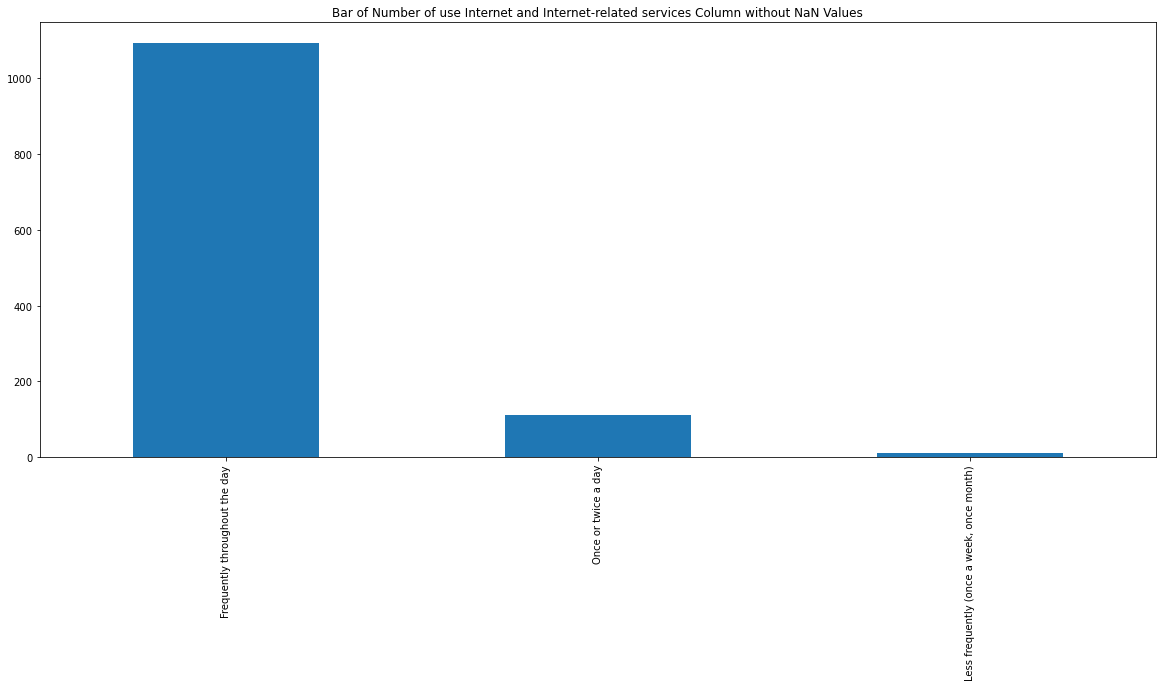

In [31]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Number of use Internet and Internet-related services"].value_counts().plot(kind='bar',title="Bar of Number of use Internet and Internet-related services Column without NaN Values")

##### Fill Internet/ Digital devices skills level Columns

In [32]:
df["Internet/ Digital devices skills level"].value_counts()

Intermediate (e.g. able to install and run special software, make modifications to the settings of the computer, have a good understanding of hardware and software)    763
Beginner/Basic (e.g. start computer and phone, go to specified web page. Use Word. Use social media)                                                                    289
Expert (e.g. computer engineering, database administration, network engineering)                                                                                        153
Name: Internet/ Digital devices skills level, dtype: int64

<AxesSubplot:title={'center':'Bar of Internet/ Digital devices skills level Column with NaN Values'}>

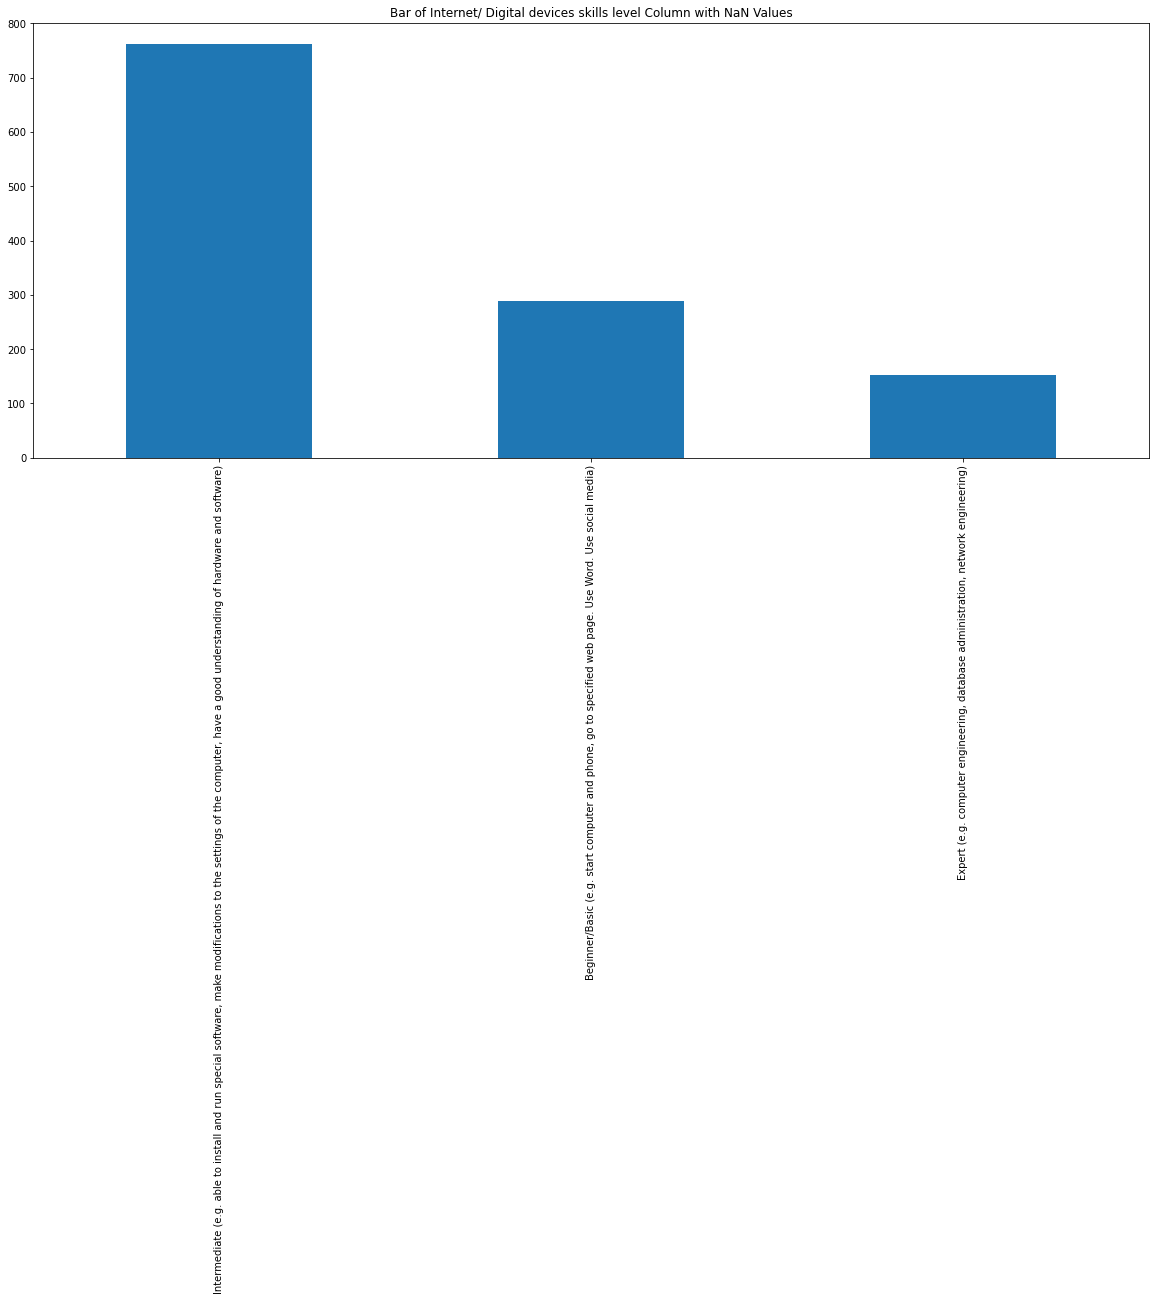

In [33]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Internet/ Digital devices skills level"].value_counts().plot(kind='bar',title="Bar of Internet/ Digital devices skills level Column with NaN Values")

In [34]:
# Calculate mode
InternetLevel_col_mode = df["Internet/ Digital devices skills level"].mode()[0]
InternetLevel_col_mode

'Intermediate (e.g. able to install and run special software, make modifications to the settings of the computer, have a good understanding of hardware and software)'

In [35]:
# Replace NaN values with mode
df["Internet/ Digital devices skills level"] = df["Internet/ Digital devices skills level"].replace(np.NaN, InternetLevel_col_mode)

<AxesSubplot:title={'center':'Bar of Internet/ Digital devices skills level Column without NaN Values'}>

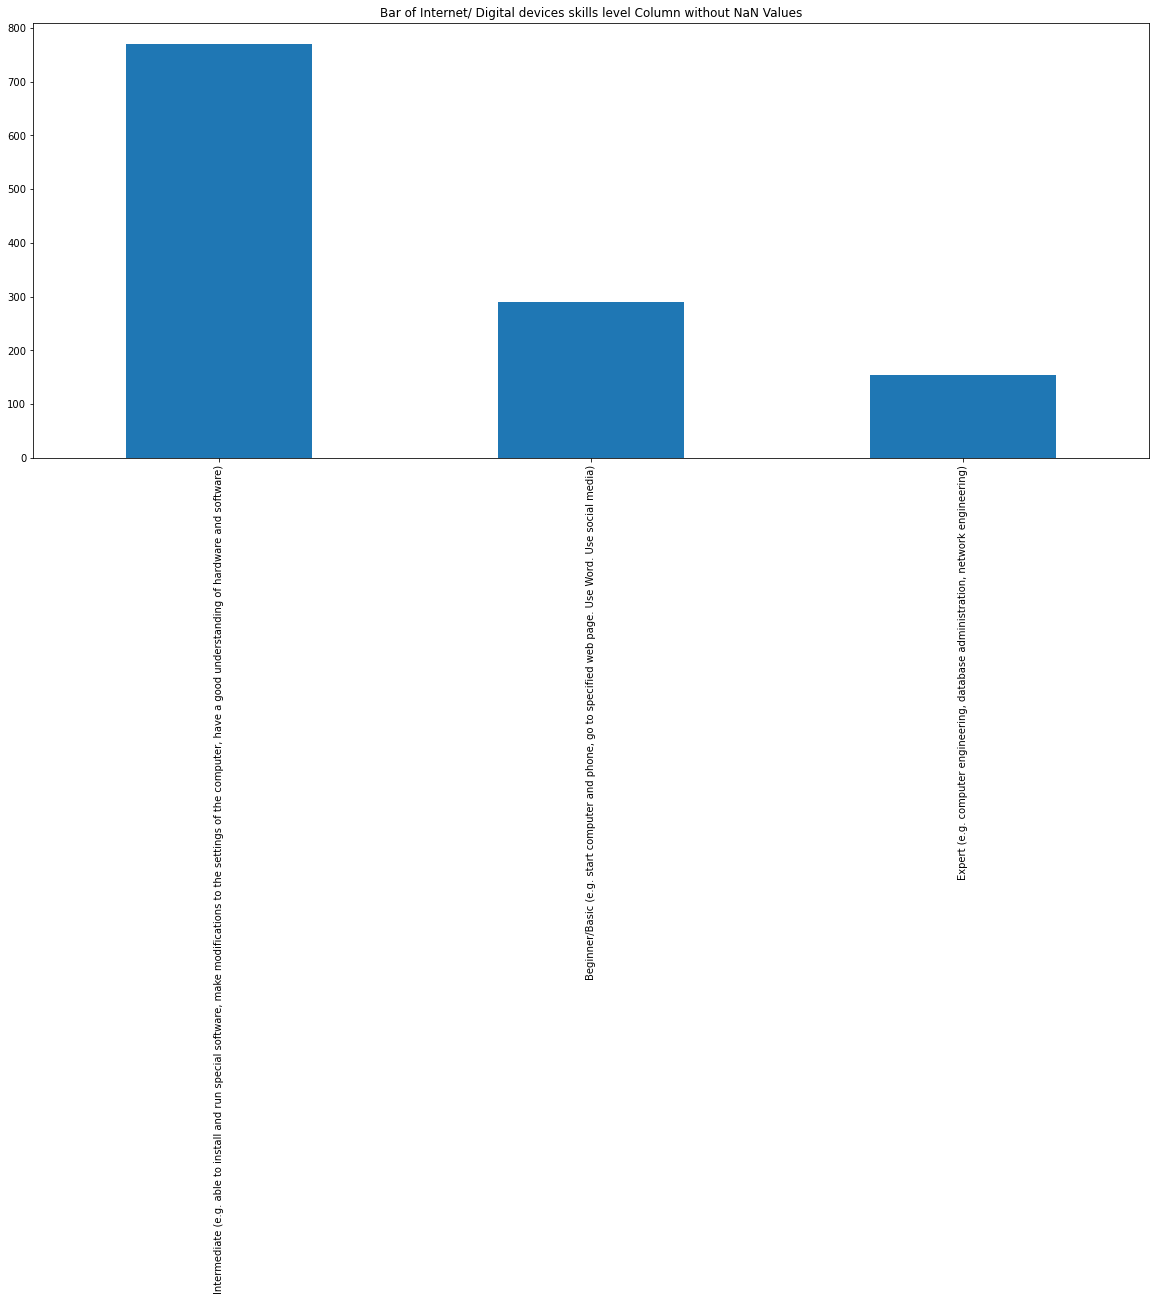

In [36]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Internet/ Digital devices skills level"].value_counts().plot(kind='bar',title="Bar of Internet/ Digital devices skills level Column without NaN Values")

##### Fill Age Column

In [37]:
df.loc[df["Age"].isnull(),:]

,Gender,Age,Education level,Major,Administrative regions,Number of use Internet and Internet-related services,Internet/ Digital devices skills level,Digital devices type,Type of connectivity,Purpose of using internet,...,Role of the government in combating cybercrimes,Victim of cybercrime,Report cybercrime,To who report cybercrime,Reason of didn't report cybercrime,"Not victim, report cybercrime","Not victim, to who report cybercrime","Not victim, Reason of didn't report cybercrime",Unnamed: 64,Unnamed: 65
351,Female,NaN,High School,Languages,Makkah,Once or twice a day,Intermediate (e.g. able to install and run spe...,Smartphone,Mobile/cellular phone network (e.g. 3G/4G),Social networks,...,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Police,NaN,NaN,NaN
645,Male,NaN,"Postgraduate (Master’s, PhD)",Social Science,Makkah,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,I don't know,Social networks,...,Don’t know,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN,NaN,NaN
779,Female,NaN,"Undergraduate (Diploma, BSc)",Computer Science,Makkah,Once or twice a day,"Expert (e.g. computer engineering, database ad...","Desktop, Laptop, Smartphone",Private Wi-Fi (e.g. in your home),"Online services, Entertainment",...,No role,No,NaN,NaN,NaN,"Yes, I would",Saudi CERT,NaN,NaN,NaN
833,Female,NaN,"Undergraduate (Diploma, BSc)",Education,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,Private Wi-Fi (e.g. in your home),"Education, Social networks, Online services, C...",...,Don’t know,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN,NaN,NaN


In [38]:
df["Age"].value_counts()

18-29    647
30-39    318
40-49    185
50+       59
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Bar of Age Column with NaN Values'}>

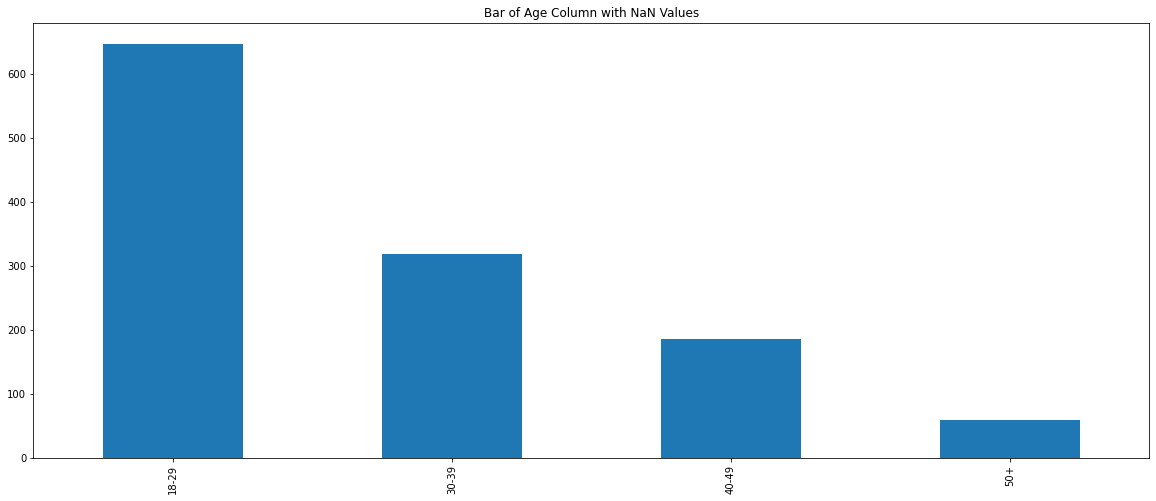

In [39]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Age"].value_counts().plot(kind='bar',title="Bar of Age Column with NaN Values")

In [40]:
# Calculate mode
age_col_mode = df["Age"].mode()[0]
age_col_mode

'18-29'

In [41]:
# Replace NaN values with mode
df["Age"] = df["Age"].replace(np.NaN, age_col_mode)

<AxesSubplot:title={'center':'Bar of age Column without NaN Values'}>

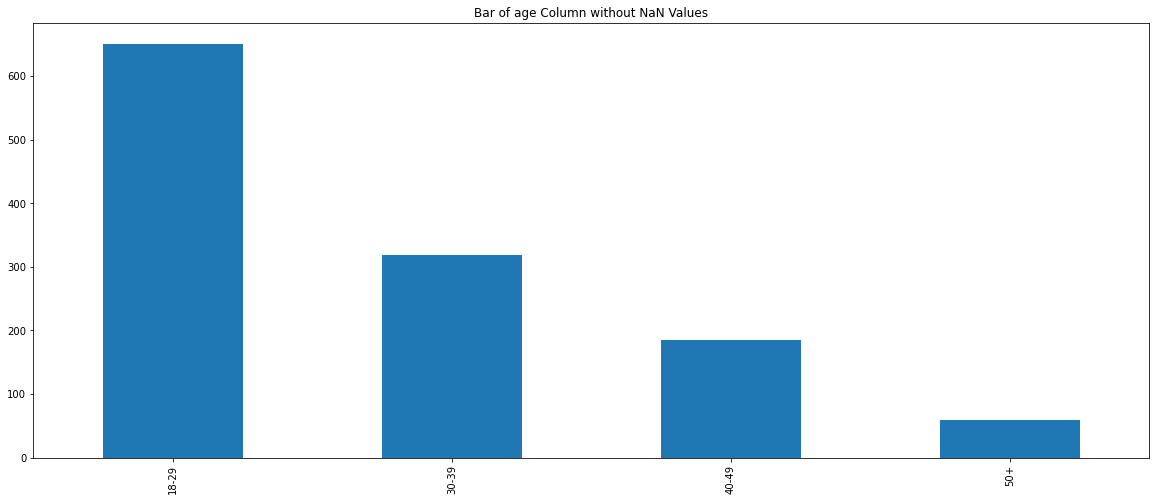

In [42]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Age"].value_counts().plot(kind='bar',title="Bar of age Column without NaN Values")

#### Filling Missing Values by Forward Technique

##### Fill Digital devices type Columns

In [43]:
#Removes spaces at the beginning and end of the string values
df["Digital devices type"] =df["Digital devices type"].str.strip()

In [44]:
df["Digital devices type"].value_counts()

Smartphone                                                  491
Laptop, Smartphone                                          293
Laptop, Smartphone, Tablet                                   91
Desktop, Laptop, Smartphone                                  88
Desktop, Laptop, Smartphone, Tablet                          82
Laptop                                                       50
Desktop, Smartphone                                          44
Smartphone, Tablet                                           27
Desktop                                                      13
Tablet                                                       11
Desktop, Smartphone, Tablet                                  11
Laptop, Tablet                                                5
Desktop, Laptop, Smartphone, Tablet, AppleTV                  1
Desktop, Laptop, Smartphone, Tablet, AppleTV,Smart watch      1
Desktop, Laptop, Smartphone, Tablet, Smart watch              1
Laptop, Smartphone, Smartwatch          

<AxesSubplot:title={'center':'Bar of Digital devices type Column with NaN Values'}>

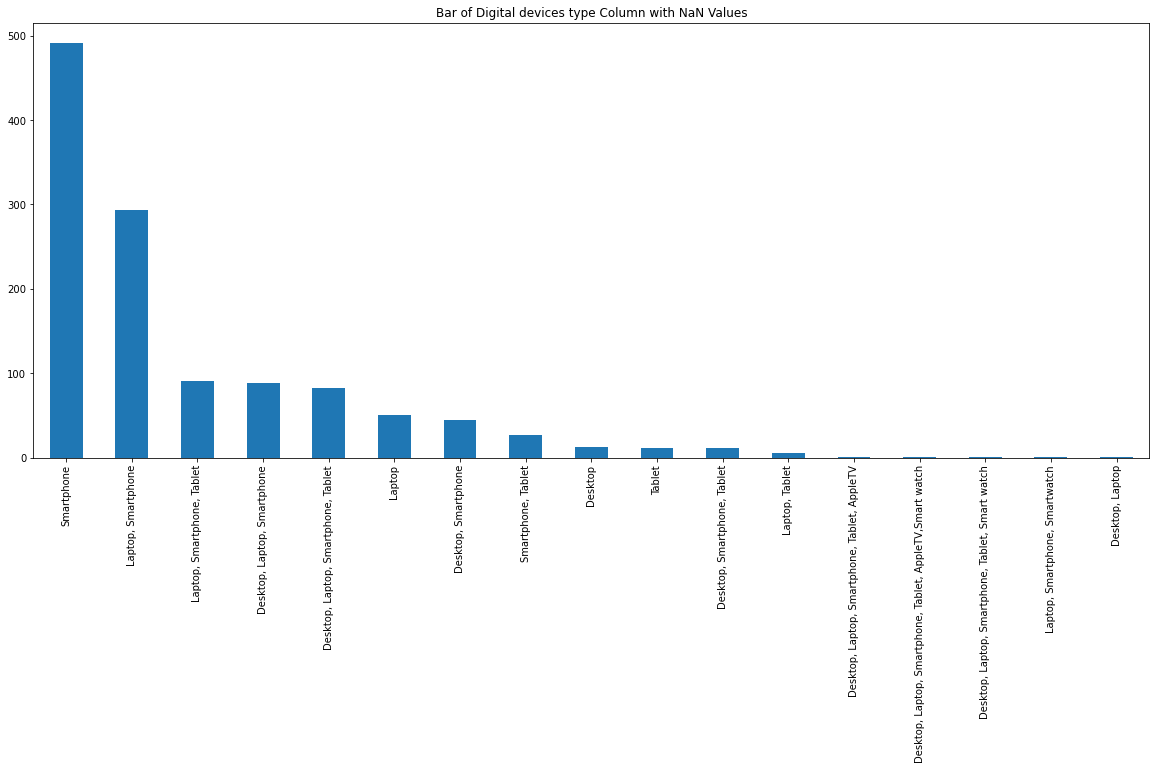

In [45]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Digital devices type"].value_counts().plot(kind='bar',title="Bar of Digital devices type Column with NaN Values")

In [46]:
# Forward fill using fillna() method="ffill"
df["Digital devices type"]=df["Digital devices type"].fillna(method="ffill")

In [47]:
#Check all missing values have been filled
df["Digital devices type"].isnull().sum()

0

<AxesSubplot:title={'center':'Bar of Digital devices type Column without NaN Values'}>

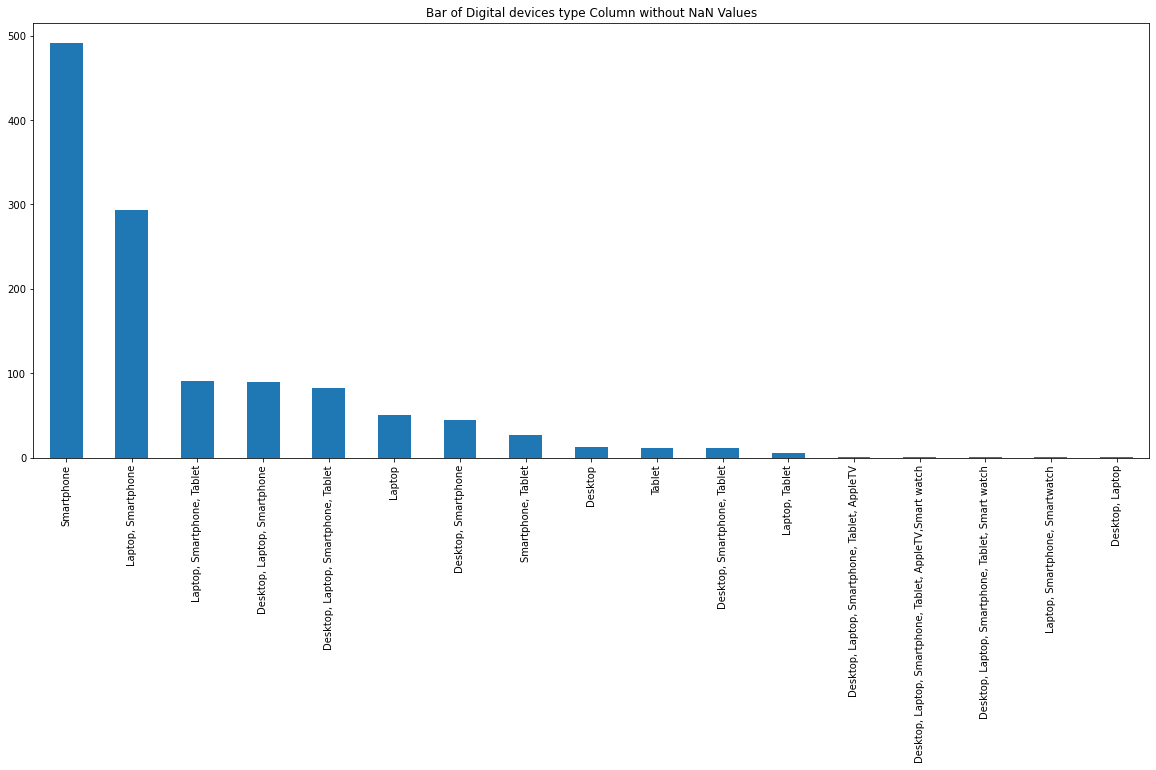

In [48]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Digital devices type"].value_counts().plot(kind='bar',title="Bar of Digital devices type Column without NaN Values")

##### Fill Type of connectivity Columns

In [49]:
#Removes spaces at the beginning and end of the string values
df["Type of connectivity"] =df["Type of connectivity"].str.strip()

In [50]:
df["Type of connectivity"].value_counts()

Private Wi-Fi (e.g. in your home), Mobile/cellular phone network (e.g. 3G/4G)                                                           450
Mobile/cellular phone network (e.g. 3G/4G)                                                                                              312
Private Wi-Fi (e.g. in your home)                                                                                                       257
Public Wi-Fi (e.g. in coffee shop), Private Wi-Fi (e.g. in your home), Mobile/cellular phone network (e.g. 3G/4G)                        59
Public Wi-Fi (e.g. in coffee shop), Mobile/cellular phone network (e.g. 3G/4G)                                                           40
Public Wi-Fi (e.g. in coffee shop)                                                                                                       27
Private Wi-Fi (e.g. in your home), Mobile/cellular phone network (e.g. 3G/4G), Broadband (wired)                                         25
Public Wi-Fi (e.g. i

<AxesSubplot:title={'center':'Bar of Type of connectivity Column with NaN Values'}>

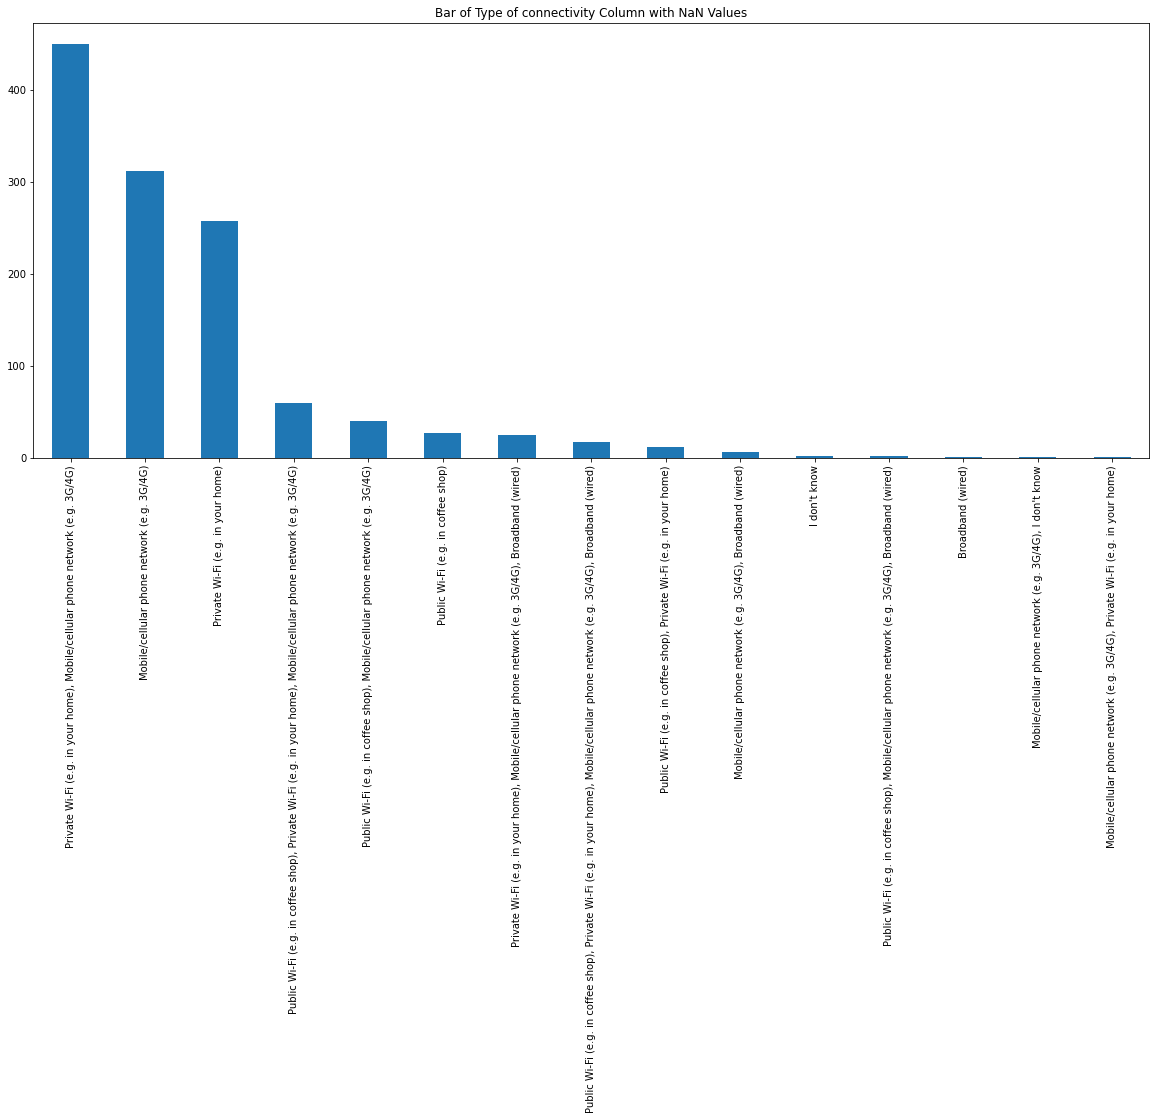

In [51]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Type of connectivity"].value_counts().plot(kind='bar',title="Bar of Type of connectivity Column with NaN Values")

In [52]:
# Forward fill using fillna() method="ffill"
df["Type of connectivity"]=df["Type of connectivity"].fillna(method="ffill")

In [53]:
#Check all missing values have been filled
df["Type of connectivity"].isnull().sum()

0

<AxesSubplot:title={'center':'Bar of Type of connectivity Column without NaN Values'}>

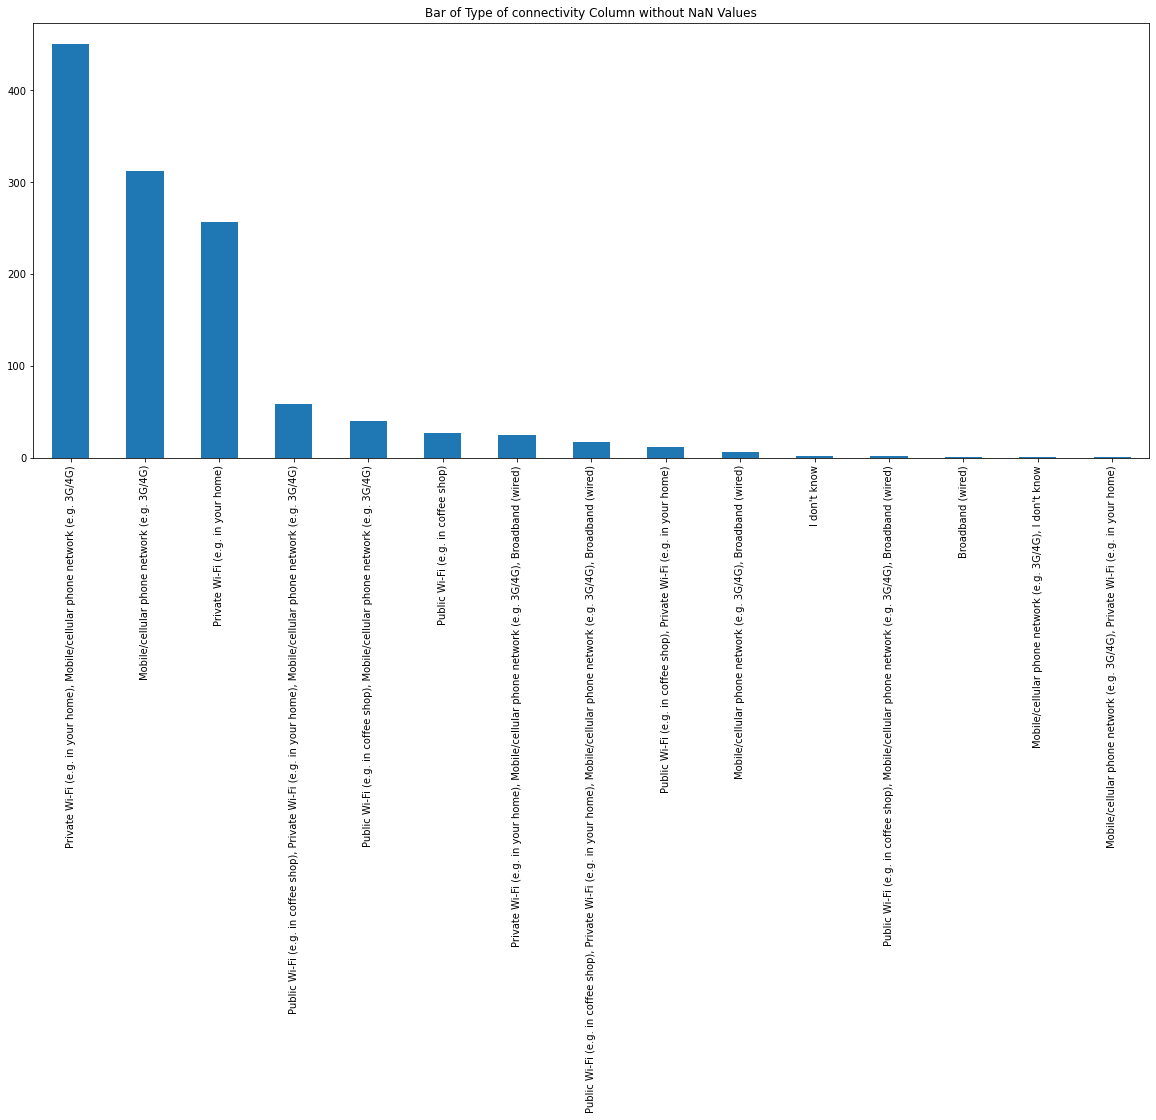

In [54]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Type of connectivity"].value_counts().plot(kind='bar',title="Bar of Type of connectivity Column without NaN Values")

##### Fill Operating system of desktop/laptop Columns

In [55]:
#Removes spaces at the beginning and end of the string values
df["Operating system of desktop/laptop"] =df["Operating system of desktop/laptop"].str.strip()

In [56]:
df["Operating system of desktop/laptop"].value_counts()

Windows 10                                                               549
Windows 7                                                                166
I don't know                                                             161
Windows 8                                                                 80
mac OS                                                                    72
Windows 10, mac OS                                                        36
Windows 10, Windows 7                                                     25
Windows 10, I don't know                                                  17
Windows 10, Windows 8                                                     14
Windows 7, I don't know                                                   13
Windows 10, Linux                                                         12
Old Windows version                                                       11
Windows 8, I don't know                                                    7

<AxesSubplot:title={'center':'Bar of Operating system of desktop/laptop Column with NaN Values'}>

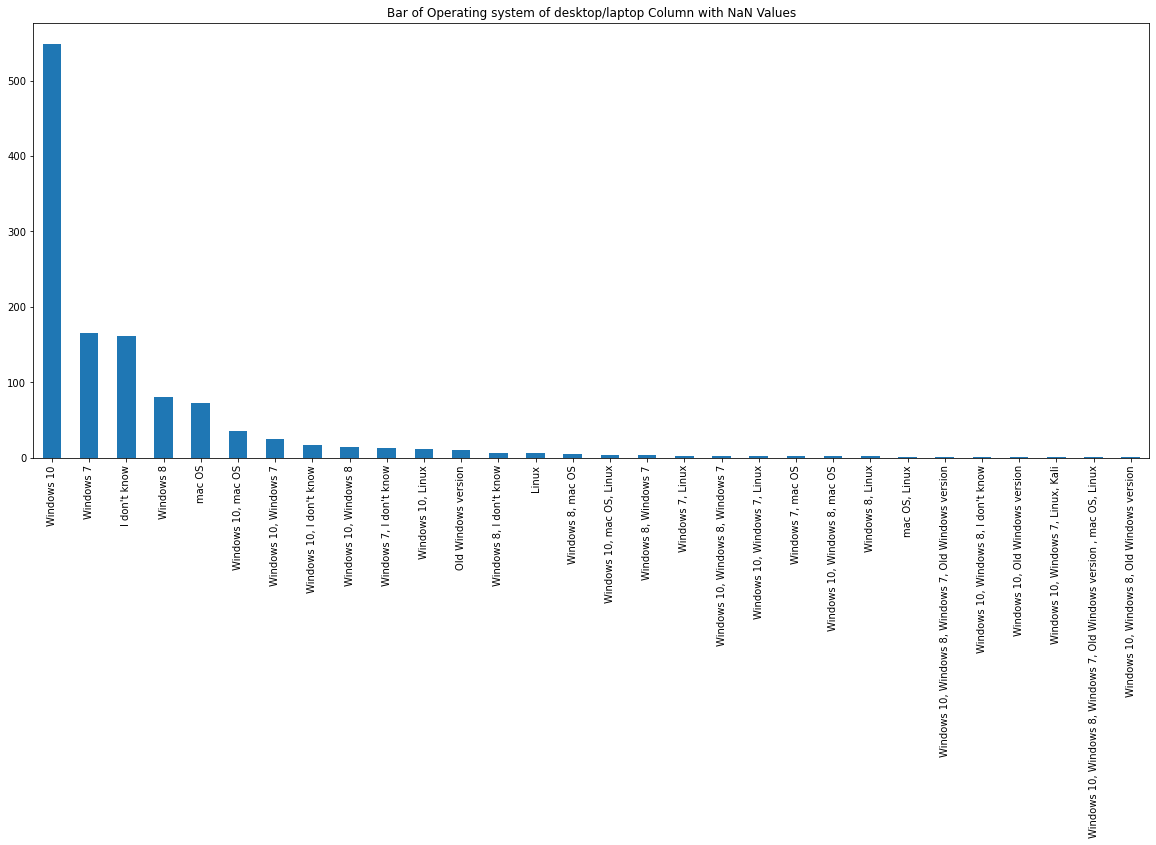

In [57]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Operating system of desktop/laptop"].value_counts().plot(kind='bar',title="Bar of Operating system of desktop/laptop Column with NaN Values")

In [58]:
# Forward fill using fillna() method="ffill"
df["Operating system of desktop/laptop"]=df["Operating system of desktop/laptop"].fillna(method="ffill")

In [59]:
#Check all missing values have been filled
df["Operating system of desktop/laptop"].isnull().sum()

0

<AxesSubplot:title={'center':'Bar of Operating system of desktop/laptop Column without NaN Values'}>

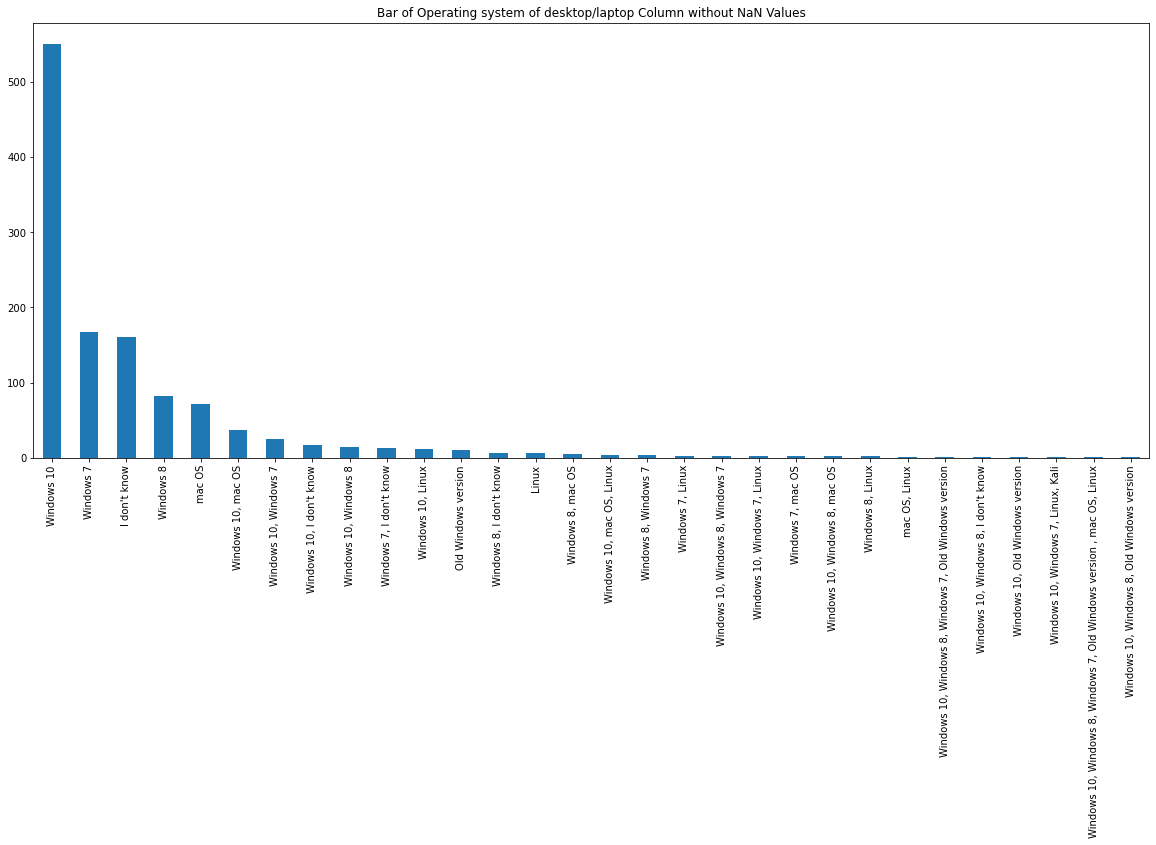

In [60]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Operating system of desktop/laptop"].value_counts().plot(kind='bar',title="Bar of Operating system of desktop/laptop Column without NaN Values")

##### Fill Major Columns

In [61]:
#Removes spaces at the beginning and end of the string values
df["Major"] =df["Major"].str.strip()

In [62]:
df["Major"].value_counts().sort_index()

Actuarial Science                   1
Administrative Sciences             1
Applied math                        1
Applied science                     1
Arabic Language                    16
Arts                                2
Automotaive Mechanics               1
Aviation                            1
Biology                             8
Biotechnology                       1
Business Administration            59
Chemistry                           1
Chemsitry                          19
Computer Science                  290
Counting                            7
Designing                           3
Economic                            3
Education                         233
Engineering                        79
English                             2
English language                    1
Environmental Science               1
Environmental Sciences              1
Finance                             3
General Administration              4
Graphic design                      1
History     

In [63]:
#Edit some values that contain spelling mistakes to keep data consistent 
df.loc[df['Major'] =="Chemistry", 'Major']="Chemsitry"
df.loc[df['Major'] =="English language", 'Major']="English"
df.loc[df['Major'] =="Environmental Sciences", 'Major']="Environmental Science"
df.loc[df['Major'] =="Natural science", 'Major']="Natural Science"

<AxesSubplot:title={'center':'Bar of Major Column with NaN Values'}>

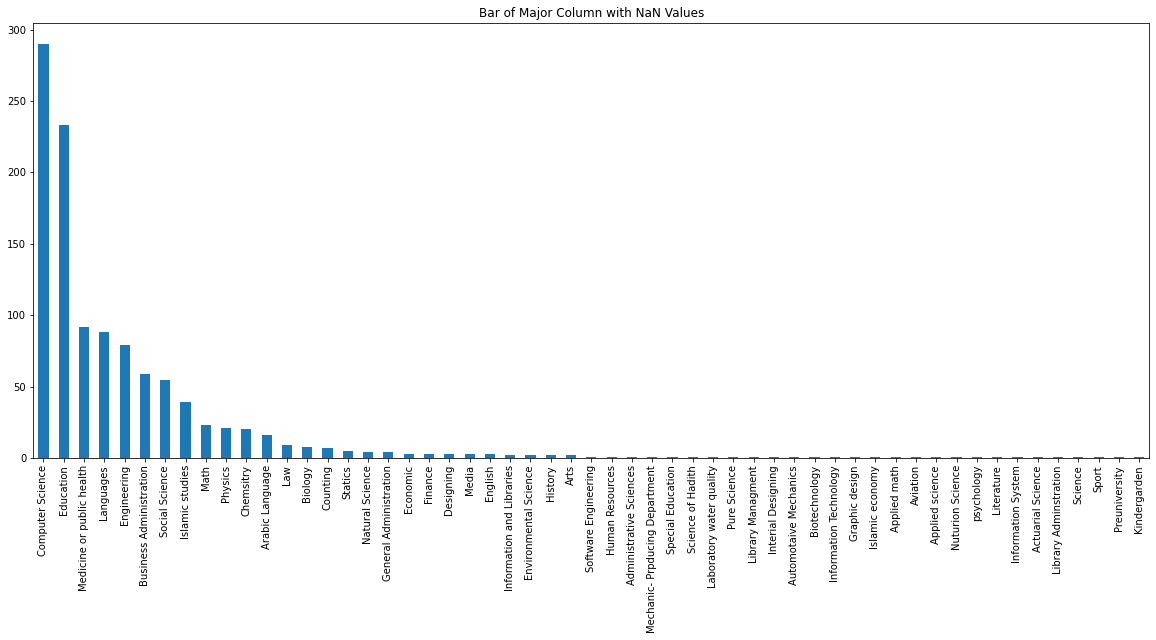

In [64]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Major"].value_counts().plot(kind='bar',title="Bar of Major Column with NaN Values")

In [65]:
# Forward fill using fillna() method="ffill"
df["Major"]=df["Major"].fillna(method="ffill")

In [66]:
#Check all missing values have been filled
df["Major"].isnull().sum()

0

<AxesSubplot:title={'center':'Bar of Major Column without NaN Values'}>

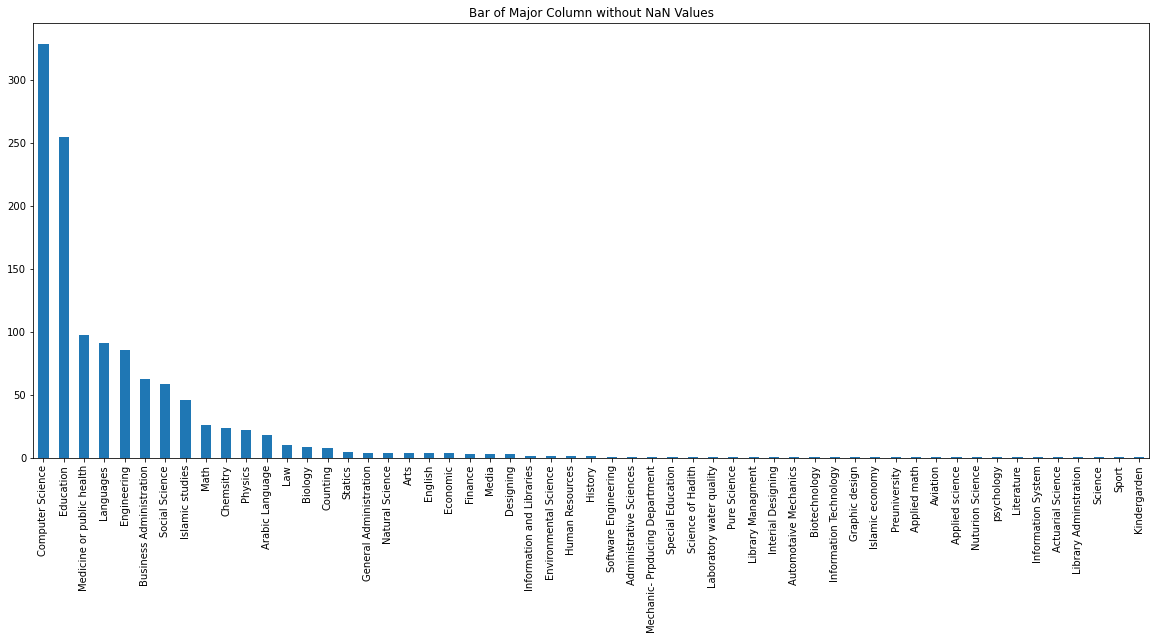

In [67]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Major"].value_counts().plot(kind='bar',title="Bar of Major Column without NaN Values")

#### Filling Missing Values by Backward Technique

##### Fill Administrative regions Columns

In [68]:
#Removes spaces at the beginning and end of the string values
df["Administrative regions"] =df["Administrative regions"].str.strip()

In [69]:
df["Administrative regions"].value_counts().sort_index()

Aljawf                4
Asir                 35
Baha                 18
Eastern Province     93
Ha'il                 2
Jazan                 7
Madina               56
Makkah              753
Najran                2
Northern Borders      2
Qassim               22
Riyadh              110
Tabuk                25
Name: Administrative regions, dtype: int64

<AxesSubplot:title={'center':'Bar of Administrative regions Column with NaN Values'}>

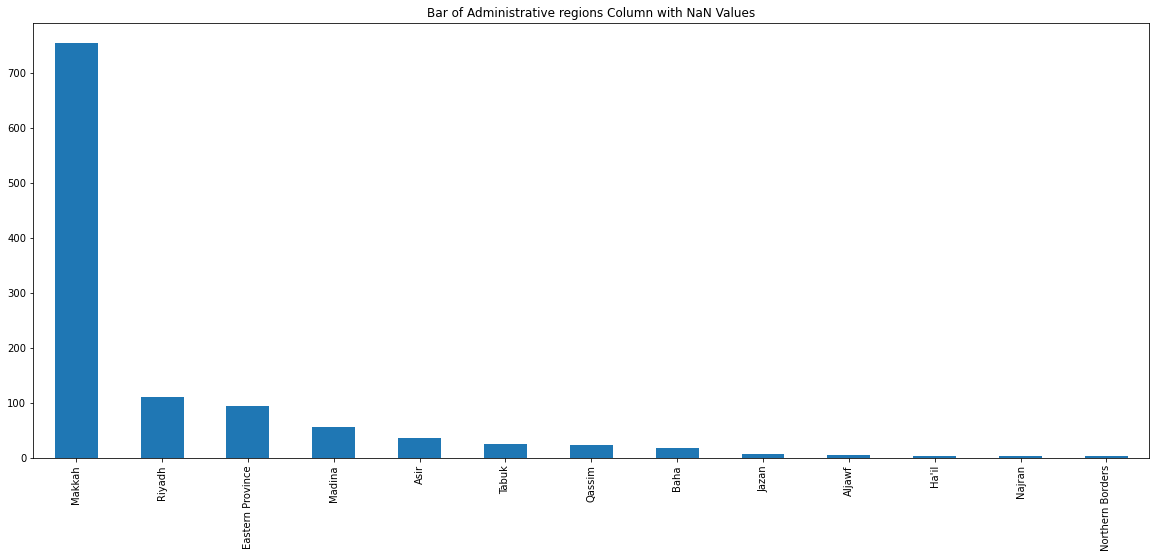

In [70]:
# Plot a bar chart with bins=20 to see distribution of data before filling the missing values
plt.figure(figsize=(20,8))
df["Administrative regions"].value_counts().plot(kind='bar',title="Bar of Administrative regions Column with NaN Values")

In [71]:
# Backward fill using fillna() method="ffill"
df["Administrative regions"]=df["Administrative regions"].fillna(method="bfill")

In [72]:
#Check all missing values have been filled
df["Administrative regions"].isnull().sum()

0

<AxesSubplot:title={'center':'Bar of Administrative regions Column without NaN Values'}>

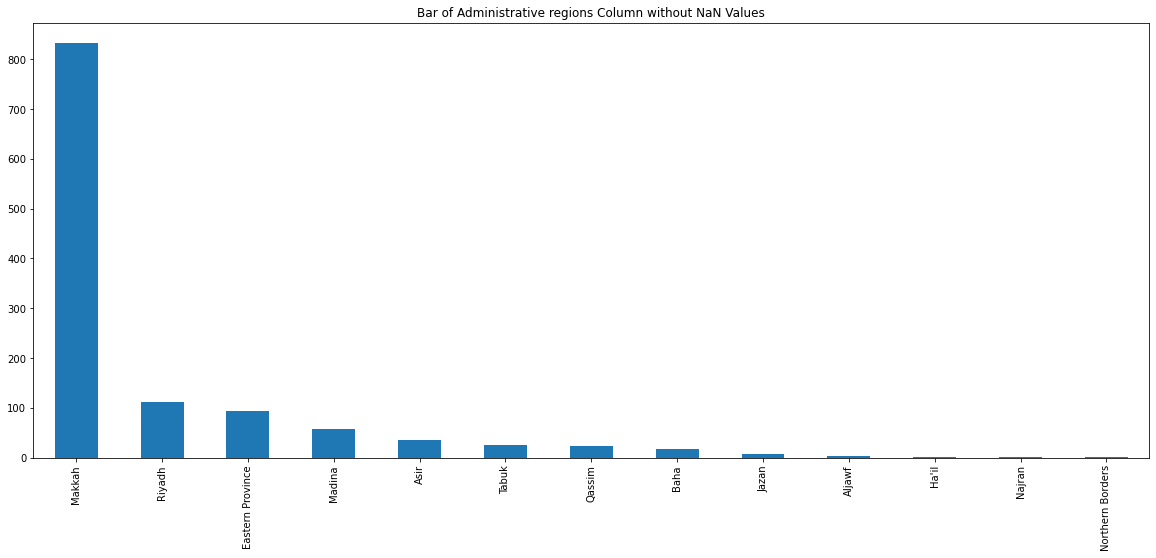

In [73]:
# Plot a bar chart with bins=20 to see distribution of data after filling the missing values
plt.figure(figsize=(20,8))
df["Administrative regions"].value_counts().plot(kind='bar',title="Bar of Administrative regions Column without NaN Values")

#### Other 

##### Report cybercrime and Not victim, report cybercrime

In [74]:
df['Report cybercrime'].isnull().sum()

951

In [75]:
df["Not victim, report cybercrime"].isnull().sum()

0

In [76]:
df.drop(['Report cybercrime'], axis=1, inplace=True)

In [77]:
#Change the name of columns
df = df.rename(columns = { "Not victim, report cybercrime" : 'Report cybercrime'})

##### To who report cybercrime and Not victim, to who report cybercrime

In [78]:
#Removes spaces at the beginning and end of the string values
df['To who report cybercrime'] =df['To who report cybercrime'].str.strip()

In [79]:
df['To who report cybercrime'].value_counts()

Saudi eGovernment Portal                                                                       23
Police                                                                                         14
Saudi CERT                                                                                      7
Committee for the Promotion of Virtue and the Prevention of Vice                                7
Bank                                                                                            6
Saudi eGovernment Portal , Police                                                               3
No one                                                                                          3
Apple store                                                                                     2
Specilist                                                                                       2
Facebook                                                                                        1
Technical Support in

In [80]:
df['To who report cybercrime'].isnull().sum()

1137

In [81]:
#Removes spaces at the beginning and end of the string values
df['Not victim, to who report cybercrime'] =df['Not victim, to who report cybercrime'].str.strip()

In [82]:
df['Not victim, to who report cybercrime'].value_counts()

Don’t know but will ask friends for advice                                                                                                                     275
Saudi eGovernment Portal                                                                                                                                       132
Saudi CERT                                                                                                                                                     103
Saudi eGovernment Portal , Saudi CERT                                                                                                                           86
Police                                                                                                                                                          62
Saudi eGovernment Portal , Saudi CERT, Police                                                                                                                   42
Saudi eGovernment Port

In [83]:
df['Not victim, to who report cybercrime'].isnull().sum()

310

In [84]:
for i in df.index:
    if((pd.isnull(df.loc[i,"To who report cybercrime"])) and (not pd.isnull(df.loc[i,"Not victim, to who report cybercrime"]))):
        df.loc[i,"To who report cybercrime"]= df.loc[i,"Not victim, to who report cybercrime"]
    elif((not pd.isnull(df.loc[i,"To who report cybercrime"])) and (pd.isnull(df.loc[i,"Not victim, to who report cybercrime"]))):
        df.loc[i,"Not victim, to who report cybercrime"] = df.loc[i,"To who report cybercrime"]
 


df['Not victim, to who report cybercrime'].isnull().sum()

234

In [85]:
df.drop(['To who report cybercrime'], axis=1, inplace=True)

In [86]:
#Change the name of columns
df = df.rename(columns = { "Not victim, to who report cybercrime" : "To who report cybercrime"})

In [87]:
# Backward fill using fillna() method="bfill"
df["To who report cybercrime"]=df["To who report cybercrime"].fillna(method="bfill")

In [88]:
df['To who report cybercrime'].isnull().sum()

0

#### Delete Columns

In [89]:
df.drop(['Delete 1','Delete 2','Reason of didn\'t report cybercrime','Not victim, Reason of didn\'t report cybercrime','Unnamed: 64','Unnamed: 65'], axis=1, inplace=True)

In [90]:
df.isnull().sum()

Gender                                                                                               0
Age                                                                                                  0
Education level                                                                                      0
Major                                                                                                0
Administrative regions                                                                               0
Number of use Internet and Internet-related services                                                 0
Internet/ Digital devices skills level                                                               0
Digital devices type                                                                                 0
Type of connectivity                                                                                 0
Purpose of using internet                                                

In [91]:
df.to_csv('Cleaned data.csv', index=False)

## EDA

In [92]:
df['Victim of cybercrime'].value_counts() # TARGET

No     951
Yes    262
Name: Victim of cybercrime, dtype: int64

Text(0, 0.5, 'Number of victims')

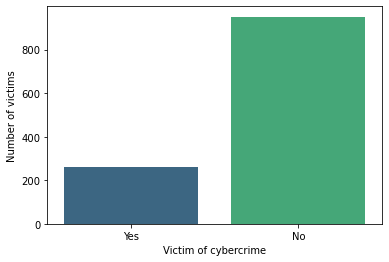

In [95]:
# first ploting the TARGET
A = sns.countplot(data=df, x='Victim of cybercrime', palette="viridis")
A.set_ylabel('Number of victims')

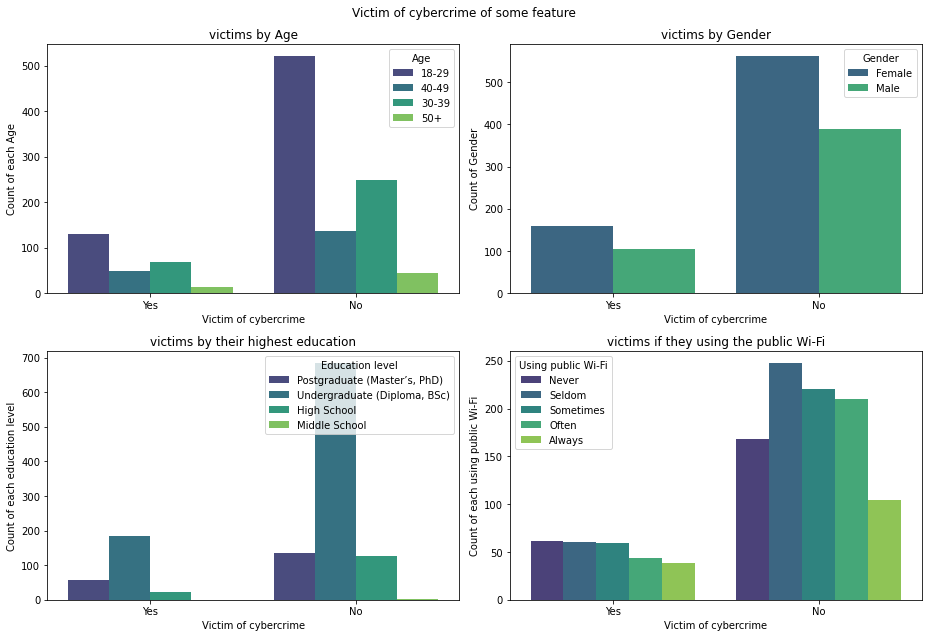

In [96]:
# Subplot
plt.figure(figsize=(13,9))


#plot 1: victims by Age

plt.subplot(2, 2, 1) 
A = sns.countplot(x='Victim of cybercrime', hue='Age', data=df, palette="viridis")
A.set_title('victims by Age')
A.set_ylabel('Count of each Age')

#plot 2: victims by gender

plt.subplot(2, 2, 2) 
B = sns.countplot(x='Victim of cybercrime', hue='Gender', data=df, palette="viridis")
B.set_title('victims by Gender')
B.set_ylabel('Count of Gender')

# plot 3: victims by their highest education

plt.subplot(2,2,3) 
C= sns.countplot(x='Victim of cybercrime', hue='Education level', data=df, palette="viridis")
C.set_title('victims by their highest education')
C.set_ylabel('Count of each education level')

# plot 4: victims if they using the public Wi-Fi

plt.subplot(2,2,4) 
D = sns.countplot(x='Victim of cybercrime', hue='Using public Wi-Fi', data=df, palette="viridis")
D.set_title('victims if they using the public Wi-Fi')
D.set_ylabel('Count of each using public Wi-Fi')

plt.suptitle("Victim of cybercrime of some feature")
plt.tight_layout()
plt.show()

In [145]:
#Employment Sector by each year
dfMajor = df.groupby(['Major', 'Victim of cybercrime'])\
                     .size()\
                     .unstack("Victim of cybercrime")\
                     .reset_index( )

dfMajor.head()

Victim of cybercrime,Major,No,Yes
0,Actuarial Science,1.0,NaN
1,Administrative Sciences,1.0,NaN
2,Applied math,NaN,1.0
3,Applied science,1.0,NaN
4,Arabic Language,14.0,4.0


In [146]:
# Total for each year for the 'Employment Sector'
dfMajor["sum"] = dfMajor.iloc[:,1:].apply(lambda x: sum(x), axis=1)
dfMajor.head()

Victim of cybercrime,Major,No,Yes,sum
0,Actuarial Science,1.0,NaN,NaN
1,Administrative Sciences,1.0,NaN,NaN
2,Applied math,NaN,1.0,NaN
3,Applied science,1.0,NaN,NaN
4,Arabic Language,14.0,4.0,18.0


In [147]:
# SORTING

dfMajor = dfMajor.sort_values("sum").set_index("Major")

dfMajor.head()

Victim of cybercrime,No,Yes,sum
Major,,,
Information and Libraries,1.0,1.0,2.0
Finance,1.0,2.0,3.0
Designing,1.0,2.0,3.0
Arts,3.0,1.0,4.0
Natural Science,3.0,1.0,4.0


In [141]:
dfMajor.sort_values("sum", axis = 0, ascending = True,
                 inplace = True, na_position ='first')
dfMajor.tail(10)

Victim of cybercrime,No,Yes,sum
Major,,,
Chemsitry,22.0,2.0,24.0
Math,25.0,1.0,26.0
Islamic studies,36.0,10.0,46.0
Social Science,45.0,14.0,59.0
Business Administration,51.0,12.0,63.0
Engineering,72.0,14.0,86.0
Languages,68.0,23.0,91.0
Medicine or public health,79.0,19.0,98.0
Education,197.0,58.0,255.0


In [142]:
Majors = dfMajor.tail(10)

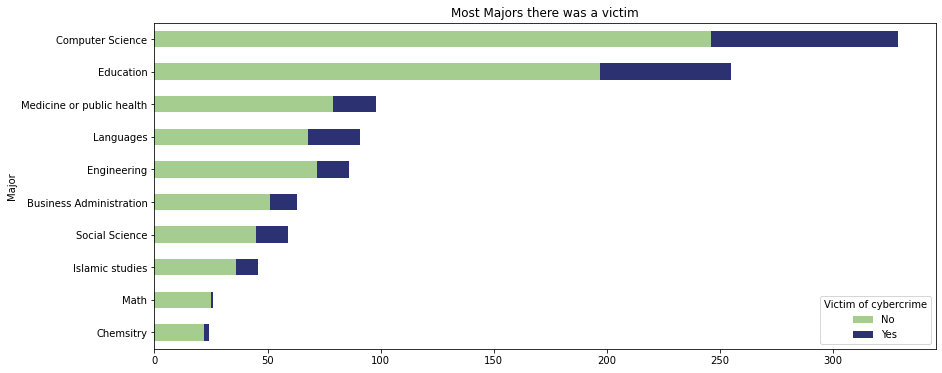

In [143]:
Majors.drop("sum", axis=1).plot.barh(figsize=(14,6), colormap='crest', stacked=True, title="Most Majors there was a victim")
plt.show();



Text(0, 0.5, 'number of them')

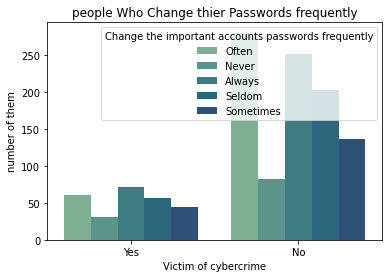

In [99]:

A = sns.countplot(x='Victim of cybercrime', hue='Change the important accounts passwords frequently', 
              data=df, palette="crest")
A.set_title('people Who Change thier Passwords frequently')
A.set_ylabel('number of them')



Text(0, 0.5, 'Number of them by each Age')

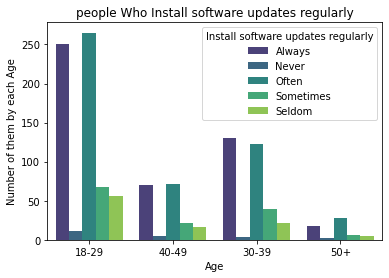

In [100]:
A = sns.countplot(x='Age', hue='Install software updates regularly', data=df, palette="viridis")
A.set_title('people Who Install software updates regularly')
A.set_ylabel('Number of them by each Age')

In [101]:
df['Password with personal information'].value_counts()

Often        359
Seldom       262
Always       260
Never        209
Sometimes    123
Name: Password with personal information, dtype: int64

<AxesSubplot:title={'center':'How many people Have personal information in their Password'}, ylabel='Password with personal information'>

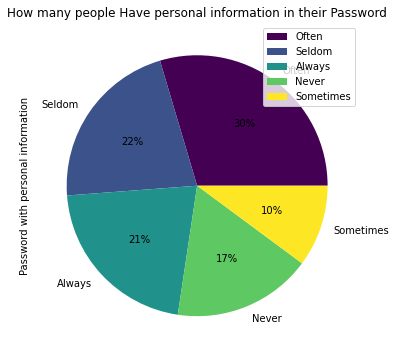

In [102]:

 df["Password with personal information"].value_counts(normalize=True).plot(kind="pie", figsize=(9,6), legend=True, autopct='%.f%%', colormap='viridis', title="How many people Have personal information in their Password")
    